In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
columns=['name', 'gender', 'number']
yob=pd.read_table('C:\\Users\\lizav\\OneDrive\\Рабочий стол\\soldatov_ks-data-69c734973a6a\\babynames\\yob1997.txt',
                    sep=',', engine='python', names=columns)
yob

name gender  number
0        Emily      F   25730
1      Jessica      F   21043
2       Ashley      F   20890
3        Sarah      F   20674
4       Hannah      F   20581
...        ...    ...     ...
26956    Zhane      M       5
26957     Zian      M       5
26958     Ziar      M       5
26959   Zohair      M       5
26960    Zohar      M       5

[26961 rows x 3 columns]

In [3]:
yob1=yob.pivot_table(yob, index="name", columns="gender", aggfunc='sum' )
yob1

number     
gender        F    M
name                
Aadam       NaN  5.0
Aadil       NaN  7.0
Aaditya     NaN  6.0
Aailyah    10.0  NaN
Aaisha      7.0  NaN
...         ...  ...
Zyasia      6.0  NaN
Zykeria    17.0  NaN
Zykerria    5.0  NaN
Zykia      13.0  NaN
Zyria      12.0  NaN

[24874 rows x 2 columns]

In [4]:
yob1.sum()

        gender
number  F         1739331.0
        M         1883571.0
dtype: float64

In [5]:
yob1=yob.pivot_table('number', index="gender", aggfunc='sum' )
yob1

number
gender         
F       1739331
M       1883571

In [6]:
years = range(1880, 2011)
pieces = []
for i in years:
    df = pd.read_table ('C:\\Users\\lizav\\OneDrive\\Рабочий стол\\soldatov_ks-data-69c734973a6a\\babynames\\yob%d.txt' %i,
                   sep = ',', engine = 'python' , names = columns)
    df['year'] = i
    pieces.append(df)
    data1 = pd.concat(pieces, ignore_index = True)
data1

name gender  number  year
0             Mary      F    7065  1880
1             Anna      F    2604  1880
2             Emma      F    2003  1880
3        Elizabeth      F    1939  1880
4           Minnie      F    1746  1880
...            ...    ...     ...   ...
1690779    Zymaire      M       5  2010
1690780     Zyonne      M       5  2010
1690781  Zyquarius      M       5  2010
1690782      Zyran      M       5  2010
1690783      Zzyzx      M       5  2010

[1690784 rows x 4 columns]

In [7]:
data2=data1.pivot_table('number', index="year", 
                      columns="gender", aggfunc='sum')
data2

gender        F        M
year                    
1880      90993   110493
1881      91955   100748
1882     107851   113687
1883     112322   104632
1884     129021   114445
...         ...      ...
2006    1896468  2050234
2007    1916888  2069242
2008    1883645  2032310
2009    1827643  1973359
2010    1759010  1898382

[131 rows x 2 columns]

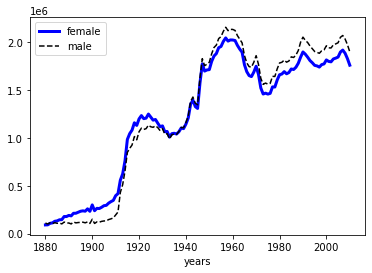

In [8]:
years = range(1880, 2011)
plt.xlabel("years")
plt.plot(data2["F"], color="b", label="female", lw=3)
plt.plot(data2["M"], color="black", label="male", linestyle="--")
plt.legend()
plt.show()

In [9]:
data1['proportion'] = data1['number'] / sum(data1['number'])
data1

name gender  number  year    proportion
0             Mary      F    7065  1880  2.191359e-05
1             Anna      F    2604  1880  8.076855e-06
2             Emma      F    2003  1880  6.212727e-06
3        Elizabeth      F    1939  1880  6.014217e-06
4           Minnie      F    1746  1880  5.415587e-06
...            ...    ...     ...   ...           ...
1690779    Zymaire      M       5  2010  1.550855e-08
1690780     Zyonne      M       5  2010  1.550855e-08
1690781  Zyquarius      M       5  2010  1.550855e-08
1690782      Zyran      M       5  2010  1.550855e-08
1690783      Zzyzx      M       5  2010  1.550855e-08

[1690784 rows x 5 columns]

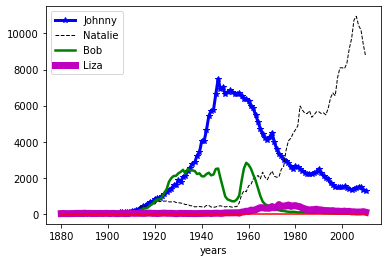

In [10]:
years = range(1880, 2011)
plt.xlabel("years")
q=data1.pivot_table('number', index="year", 
                      columns="name",aggfunc='sum')
s=data1.pivot_table('proportion', index="year", 
                      columns="name",aggfunc='sum')
plt.plot(q["Johnny"], color="b", label="Johnny", lw=3, marker='*')
plt.plot(q["Natalie"], color="black", label="Natalie", lw=1, linestyle='--')
plt.plot(q["Bob"], color="green", label="Bob", lw=2.5)
plt.plot(q["Liza"], color="m", label="Liza", lw=7)
plt.plot(s["Bob"]+s["Johnny"]+s["Natalie"]+s["Liza"], color='red')
plt.legend()
plt.show()

In [12]:
date3 = []
for i in range(1880,2011):
    maxname = data1[data1['year'] == i]
    maxname.sort_values('number',ascending=False)
    date3.append(maxname.head(1))
topnames = pd.concat(date3, ignore_index = True)
topnames

name gender  number  year  proportion
0        Mary      F    7065  1880    0.000022
1        Mary      F    6919  1881    0.000021
2        Mary      F    8149  1882    0.000025
3        Mary      F    8012  1883    0.000025
4        Mary      F    9217  1884    0.000029
..        ...    ...     ...   ...         ...
126     Emily      F   21365  2006    0.000066
127     Emily      F   19322  2007    0.000060
128      Emma      F   18765  2008    0.000058
129  Isabella      F   22222  2009    0.000069
130  Isabella      F   22731  2010    0.000071

[131 rows x 5 columns]